<a href="https://colab.research.google.com/github/blackJJW/ML/blob/main/self_study_ML/chapter4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Book : '혼자 공부하는 머신러닝 + 딥러닝', 박해선 지음, 한빛미디어

# 04-2 확률적 경사 하강법

## 점진적인 학습 또는 온라인 학습
- 앞서 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 더 훈련
  - 대표적인 알고리즘 : 확률적 경사 하강법(Stochastic Gradient Descent)

### 확률적 경사 하강법
- 훈련 세트에서 랜덤하게 하나의 샘플을 고르는 것
- 에포크(epoch) : 확률적 경사 하강법에서 훈련세트를 한 번 모두 사용하는 과정
- 미니배치 경사 하강법(minibatch gradient descent) : 여러 개의 샘플을 사용해 경사 하강법을 수행하는 방식
- 배치 경사 하강법(batch gradient descent) : 극단적으로 한 번 경사로를 따라 이동하기 위해 전체 샘플을 사용

### 손실함수
- 손실함수(loss function) : 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지 측정하는 기준
  - 값이 작을 수로 좋음
  - 어떤 값이 최솟값인지 알지 못함
   
> 손실 함수와 비용 함수
- 비용 함수(cost function)은 손실 함수의 다른 말.
- 손실 함수는 샘플 하나에 대한 손실을 정의
- 비용 함수는 훈련 세트에 있는 모든 샘플에 대한 손실 함수의 합
- 이 둘을 엄격히 구분하지는 않고 섞어 사용

## SGDClassifier

In [1]:
import pandas as pd
fish = pd.read_csv('http://bit.ly/fish_csv_data')

In [3]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

- 훈련 세트와 데스트 세트의 특성을 표준화 전처리

In [5]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [6]:
from sklearn.linear_model import SGDClassifier

- SGDClassifier의 객체를 만들 때 2개의 매개변수를 지정
  - loss : 손실 함수의 종류 지정
  - max_iter : 수행할 에포크의 횟수 지정

In [7]:
sc = SGDClassifier(loss = 'log', max_iter = 10, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


> ConvergenceWarning 경고
- 모델이 충분히 수렴하지 않음.
- max_iter의 값을 올려 준다.

- 모델을 훈련할 때는 partial_fit()
- 호출할 때마다 1 에포크씩 이어서 훈련 가능

In [9]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7815126050420168
0.8


- 점수 상승

## 에포크와 과대/과소 적합
- 확률적 경사 하강법을 사용한 모델은 에포크 횟수에 따라 과소적합 또는 과대 적합이 될 수 있다. 
- 에포크 횟수가 적으면 모델이 훈련 세트를 덜 학습
- 에포크 횟수가 충분히 많으면 훈련 세트에 완전히 학습
- 적은 에포크 횟수 동안 에 훈려한 모델은 훈련 세트와 테스트 세트에 잘 맞지 않는 과소적합된 모델일 가능성이 큼
- 많은 에포크 횟수 동안에 훈련한 모델은 훈련 세트에 너무 잘 맞아 테스트 세트에는 오히려 점수가 나쁜 과대적합된 모델일 가능성이 높다.
- 훈련 세트 점수는 에포크가 진행될수록 꾸준히 증가하지만 테스트 세트 점수는 어느 순간 감소하기 시작.
  - 바로 이 지점이 모델이 과대적합되기 시작하는 곳
  - 과대적합이 시작하기 전에 훈련을 멈추는 것을 조기 종료(early stopping)
  

In [10]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score=[]
test_score=[]
classes = np.unique(train_target)

In [12]:
for _ in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

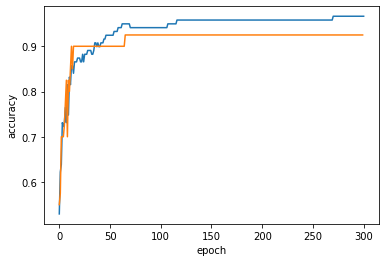

In [13]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [15]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


- SDGClassifier 는 일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈춤
  - tol :향상될 최솟값 지정

- SDGClassifier의 loss 매개변수
  - 기본값 = 'hinge', 힌지 손실(hinge loss) 혹은 서포트 벡터 머신(support vector machine) 이라 불리는 또다른 머신러닝 알고리즘을 위한 손실함수

In [16]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


## 마무리

### 키워드로 끝내는 핵심 포인트
- 확률적 경사 하강법 : 훈련 세트에서 샘플 하나씩 꺼내 손실 함수의 경사를 따라 최적의 모델을 찾는 알고리즘.
  - 샘플을 하나씩 사용하지 않고 여러 개를 사요하면 미니배치 경사 하강법
  - 한 번에 전체 샘플을 사용하면 배치 경사 하강법
- 손실함수 : 확률경사 하강법이 최적화할 대상
  - 대부분의 문제에 잘 맞는 손실 함수가 이미 정의
  - 이진 분류에는 로지스틱 회귀(또는 이진 크로스엔트로피) 손실함수를 사용
  - 다중 분류에는 크로스엔트로피 손실 함수를 사용
  - 회귀 문제에는 평균 제곱 오차 손실 함수를 사용
- 에포크 : 확률적 경사 하강법에서 전체 샘플을 모두 사용하는 한 번 반복을 의미. 일반적으로 경사 하강법 알고리즘은 수십에서 수백 번의 에포크를 반복

### 핵심 패키지와 함수
> scikit-learn
- SGDClassifier : 확률적 경사 하강법을 사용한 분류 모델 생성
  - loss : 확률적 경사 하강법으로 최적화할 손실 함수 지정
    - 기본값 : 서포트 벡터 머신을 위한 'hinge' 손실 함수
    - 'log' : 로지스틱 회귀
  - penalty : 규제의 종류
    - 기본값 :'l2'
    - L1 : 'l1'
    - alpha : 규제 강도
      - 기본값 : 0.0001
  - max_iter : 에포크 횟수, 기본값 = 1000
  - tol : 반복을 멈출 조건, 기본값 = 0.001
  - n_iter_no_change : 매개변수에서 지정한 에포크 동안 손실이 tol 만큼 줄어들지 않으면 알고리즘이 중단, 기본값 = 5
